# EE6310 - Image and Video Processing
Homework-1

## Imports

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import os
from skimage.color import rgb2gray
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Images
Images used in this Assignment aare GrayScale. Images are downloaded from University of Southern California’s image database at http://sipi.usc.edu/database/database.php?volume=misc.

## Q1: The Human Eye

Reading Image

In [2]:
img1 = pimg.imread('Images/5.3.02.tiff')

Optimal Distance

In [3]:
def EstimateOptimalDistance(Dimensions_TV, Resolution_TV, Available_Distance):
    """
    Dimensions_TV: Dimensions of TV i.e (Width, Height) in centimeters
    Resolution_TV: Resolution of TV
    Available_Distance: The available distance for the couch placement (from the TV),
    """
    if Resolution_TV[0] <= 0 or Resolution_TV[1] <= 0:
        print ("Invalid TV Resolution")
        return
    
    Optimal_Distance = (1 / (2 * np.tan(np.pi/360))) * (60 * 2 * Dimensions_TV[0] / Resolution_TV[0])
    
    if Optimal_Distance > Available_Distance:
        print ("Optimal distance is more than available distance.")
    else:
        print ("Optimal-Distance (in cm) = " + str(Optimal_Distance))

In [4]:
# Estimating Optimal Distance
EstimateOptimalDistance((166.1,93.5), (1920,1080), 1000)

Optimal-Distance (in cm) = 594.7867120774476


## Q2: Gray Scale Images 

### 2.1
- Reading an image and displaying it.

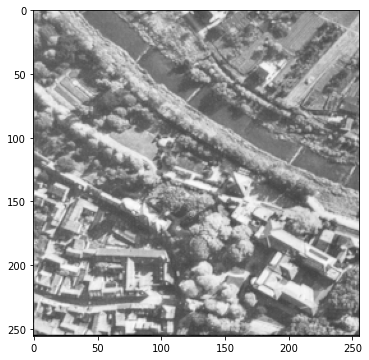

In [5]:
img2 = pimg.imread('Images/5.1.10.tiff')

# Displaying Image
plt.figure(figsize=(6,6))
plt.imshow(img2,cmap='gray')
plt.show()

### 2.2
- Maximum and Minimum pixel values of the image.
- No.of bits used for each pixel.
- Resolution of the image.

In [6]:
print('Maximum Pixel Value ',np.max(img2))
print('Minimum Pixel Value ',np.min(img2))
print('No.of bits needed ', int(1 + np.log2(np.max(img2))))
print ("Resolution:", np.shape(img2))

Maximum Pixel Value  248
Minimum Pixel Value  1
No.of bits needed  8
Resolution: (256, 256)


### 2.3
- Size of image downloaded.
- Estimated size of imgae using resolution and 8 bits per pixel.
- Efficiency of compression for storing image.

In [7]:
print ("Size of Downloaded Image:", 8*os.path.getsize('Images/5.1.10.tiff'))
print ("Estimated Size of Image:", img2.shape[0] * img2.shape[1] * 8)
print ("Efficiency of compression:", 8*os.path.getsize('Images/5.1.10.tiff')*100.0/(img2.shape[0] * img2.shape[1] * 8))

Size of Downloaded Image: 525360
Estimated Size of Image: 524288
Efficiency of compression: 100.2044677734375


### 2.4
- Bitplane of an image.

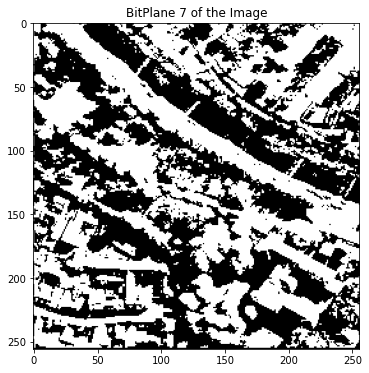

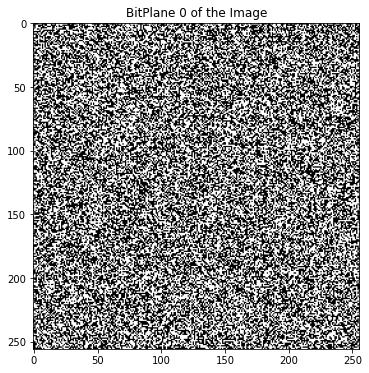

In [8]:
# Converting an image to bitplane representation
def Image2Bit(img):
    return np.reshape(np.unpackbits(np.reshape(img,(-1,1)),axis=1),(256,256,-1))

# Displaying bitplane "b" of an image
def BitPlane(img,b):
    imgbitplanes = Image2Bit(img)
    try:
        plt.figure(figsize=(6,6))
        plt.imshow(imgbitplanes[:,:,7-b],cmap='gray')
        plt.title("BitPlane " + str(b) + " of the Image")
        plt.show()
    except:
        print ("b should in the range of 0 to 7")
        
        
# Displaying BitPlanes
BitPlane(img2, 7)
BitPlane(img2, 0)

## Q3: Binary Image Processing

Reading and Displaying an Image

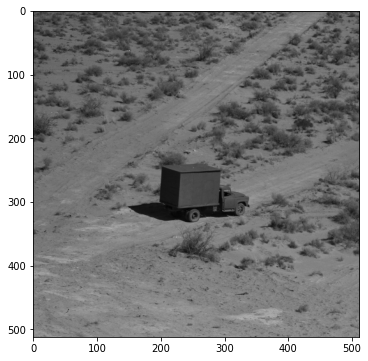

In [9]:
img3 = pimg.imread('Images/7.1.01.tiff')

# Displaying Image
plt.figure(figsize=(6,6))
plt.imshow(img3,cmap='gray')
plt.show()

### 3.1
- Plotting Histogram of an Images.
- Histograms of images airplane, truck and APC are unimodal.
- Histogram of airport is bimodal

In [10]:
# Function to Plot Histogram of Images
def ImageHistogram(img):
    Pixel = np.arange(256)
    Freq = np.bincount(img.flatten(), minlength=256)
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Image")
    
    plt.subplot(1,2,2)
    plt.title('Image Histogram')
    plt.stem(Pixel, Freq, markerfmt="")
    plt.grid()
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.show()

Histrogram of Image: 7.1.02.tiff


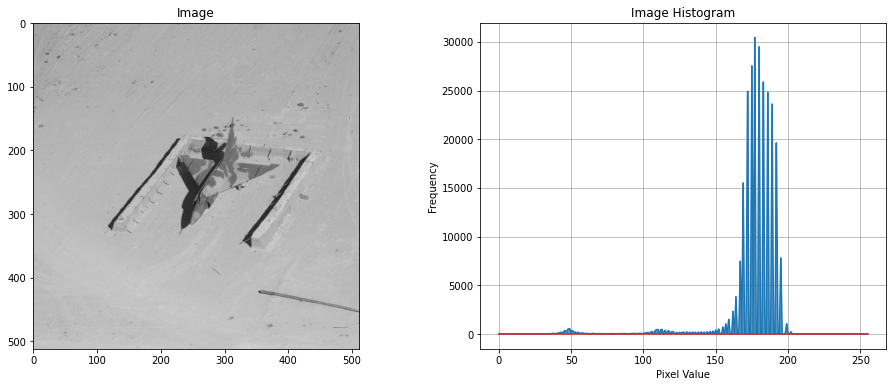


Histrogram of Image: 7.1.01.tiff


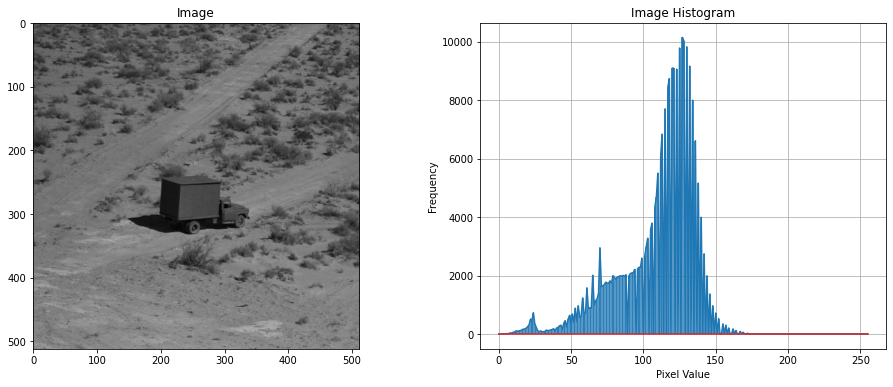


Histrogram of Image: 5.3.02.tiff


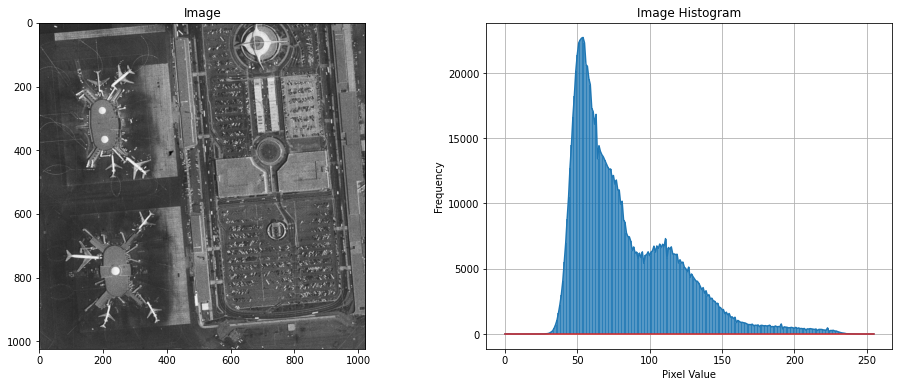


Histrogram of Image: 7.1.08.tiff


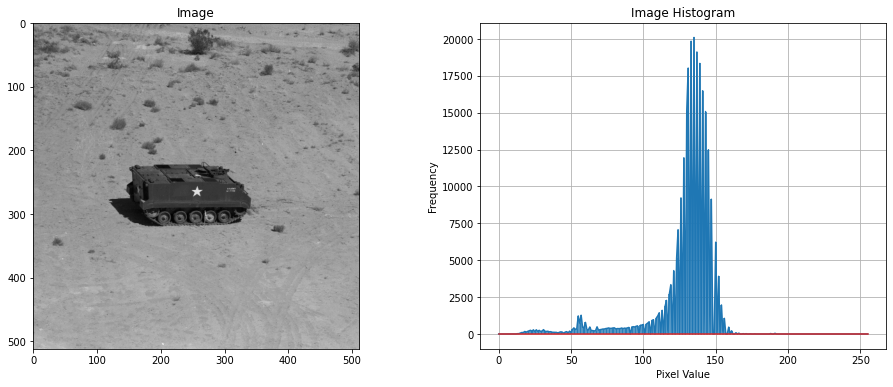

In [11]:
# Histograms of Images
for imgname in ["7.1.02.tiff", "7.1.01.tiff", "5.3.02.tiff", "7.1.08.tiff"]:
    print ("Histrogram of Image: " + imgname)
    ImageHistogram(pimg.imread('Images/' + imgname))
    print ()

### 3.2
- Binarizing image using histogram. Threshold is set as follows:
\begin{align}
\text{Threshold }(T) = 0.65 \times \text{Mode}
\end{align}

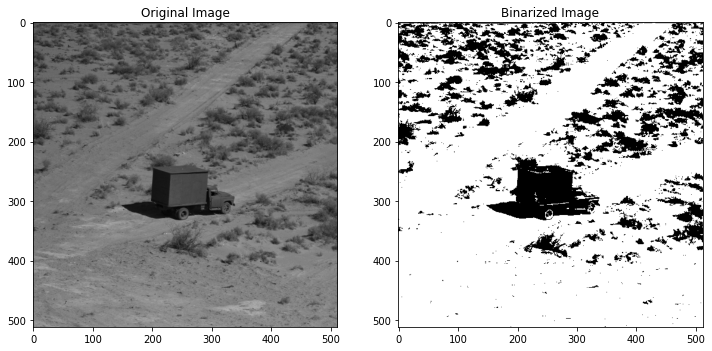

In [12]:
# Binarizing Image with Threshold
def BinarizeImage(I):
    # Frequency of each pixel
    Freq = np.bincount(I.flatten(), minlength=256)

    # Threshold (T)
    Mode = np.argmax(Freq)
    T = 0.65 * Mode

    # Binarizing Image
    Binarize_I = np.where(I < T, 0, 255)
    
    return Binarize_I


#Image
Binarize_I = BinarizeImage(img3)

# Displaying Image
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img3, cmap='gray')

plt.subplot(1,2,2)
plt.title("Binarized Image")
plt.imshow(Binarize_I, cmap='gray')

plt.show()

### 3 - Otsu's Algorithm
It is a very popular way to binarise images.

### 3(a) - Otsu's Algorithm by minimising weighted intra-class variance

In [13]:
def Otsu_IntraClassVariance(I, return_threshold = False):
    # Probability of each pixel
    PMF = np.bincount(I.flatten(), minlength=256)/(I.shape[0] * I.shape[1])
    
    Threshold = 0
    Min_IntraClassVariance = np.inf
    
    # Finding threshold
    for t in range(1,256):
        IntraClassVariance = np.sum(PMF[:t]) * np.var(I[I < t]) + np.sum(PMF[t:]) * np.var(I[I >= t])
        
        if IntraClassVariance < Min_IntraClassVariance:
            Threshold = t
            Min_IntraClassVariance = IntraClassVariance
            
    # Binarizing Image with Threshold
    Binarize_I = np.where(I < Threshold, 0, 255)
    
    if return_threshold == False:
        return Binarize_I
    else:
        return Binarize_I, Threshold

Optimal-Threshold = 97


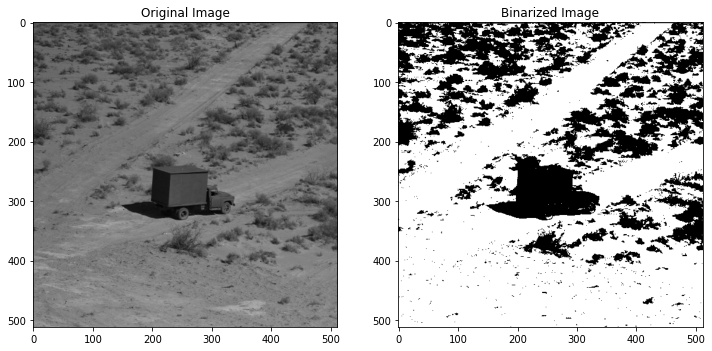

In [14]:
#Image
Binarize_I, Threshold = Otsu_IntraClassVariance(img3, return_threshold=True)
print ("Optimal-Threshold =", Threshold)

# Plotting Image
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img3, cmap='gray')

plt.subplot(1,2,2)
plt.title("Binarized Image")
plt.imshow(Binarize_I, cmap='gray')

plt.show()

### 3(b) - Otsu's Algorithm by maximising inter-class variance

In [15]:
def Otsu_InterClassVariance(I, return_threshold = False):
    # Probability of each pixel
    p = np.bincount(I.flatten(), minlength=256)/(I.shape[0] * I.shape[1])
    
    # Mean of pixels of image
    mu = np.mean(I.flatten())
    
    P0 = np.zeros((256,))
    mu0 = np.zeros((256,))
    P0[0] = p[0] 
    
    Threshold = 0
    Max_InterClassVariance = -np.inf
    
    # Finding threshold
    for t in range(1,256):
        P0[t] = P0[t-1] + p[t]
        mu0[t] = (mu0[t-1]*P0[t-1] + t*p[t])/(P0[t] + 1e-10)
        mu1 = (mu - mu0[t]*P0[t])/(1 - P0[t])
        
        InterClassVariance = P0[t]*(1 - P0[t])*np.square(mu0[t] - mu1)
        
        if InterClassVariance > Max_InterClassVariance:
            Threshold = t
            Max_InterClassVariance = InterClassVariance
    
    # Binarizing Image
    Binarize_I = np.where(I <= Threshold, 0, 255)    # (Differs in applying threshold when comapred to Intra-Class Variance Algorithm)
    
    if return_threshold == False:
        return Binarize_I
    else:
        return Binarize_I, Threshold

Optimal-Threshold = 96


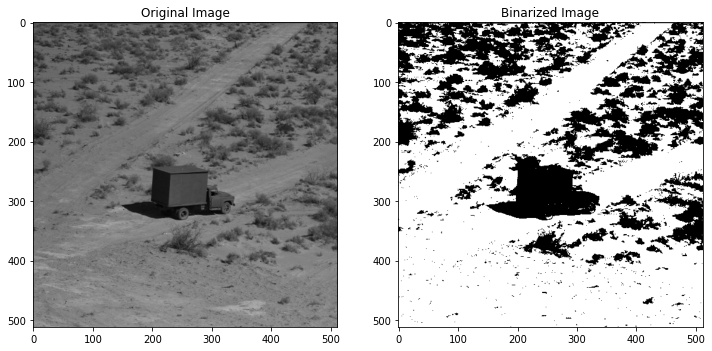

In [16]:
#Image
Binarize_I, Threshold = Otsu_InterClassVariance(img3, return_threshold=True)
print ("Optimal-Threshold =", Threshold)

# Displaying Image
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img3, cmap='gray')

plt.subplot(1,2,2)
plt.title("Binarized Image")
plt.imshow(Binarize_I, cmap='gray')

plt.show()

Comparing Images using both alogrithms

In [17]:
Binarize_I_InterClass = Otsu_InterClassVariance(img3)
Binarize_I_IntraClass = Otsu_IntraClassVariance(img3)

# Checking if both binarised images are same or not
np.all(Binarize_I_InterClass == Binarize_I_IntraClass)

True

### 3.4 - Connected Component Algorithm
Any set of pixels which is not separated by a boundary is call connected. Each maximal region of connected pixels is called a Connected-Component. Connected-Component labeling, Connected-Component analysis, blob extraction, region labeling, blob discovery, or region extraction is an algorithmic application of graph theory, where subsets of connected components are uniquely labeled based on a given heuristic.

In [18]:
# Graph Traversal
def Traverse(List_Index, k, AdjList, Blobs, visited):
    if visited[List_Index]:
        return
    else:
        visited[List_Index] = True
        Blobs[List_Index] = k
        for Element_Index in AdjList[List_Index]:
            visit(Element_Index, k, AdjList, Blobs, visited)
    return


# Depth for Search of Graph
def DFS(AdjList):
    N = len(AdjList)
    visited = N*[False]
    Blobs = N*[0]
    k = 0
    
    for i in range(N):
        if not visited[i]:
            Traverse(i, k, AdjList, Blobs, visited)
            k += 1
    return Blobs


# Connected Components Algorithm
def CCA(I):
    R = np.zeros(I.shape).astype('int64')
    AdjList = {}
    
    k = 0
    AdjList[k] = set()
    k = 1
            
    for i in range(1,I.shape[0]):
        for j in range(1,I.shape[1]):
            if (I[i][j] != I[i-1][j]) and (I[i][j] != I[i][j-1]):
                R[i][j] = k
                AdjList[k] = set()
                k += 1
            elif (I[i][j] == I[i-1][j]) and (I[i][j] != I[i][j-1]):
                R[i][j] = R[i-1][j]
            elif (I[i][j] != I[i-1][j]) and (I[i][j] == I[i][j-1]):
                R[i][j] = R[i][j-1]
            else:
                R[i][j] = min(R[i][j-1], R[i-1][j])
                if R[i][j-1] != R[i][j-1]:
                    AdjList[R[i][j-1]].add(R[i-1][j])
                    AdjList[R[i-1][j]].add(R[i][j-1])
    
    
    # Applying DFS to join connected blobs
    Blobs = DFS(AdjList)
    R = np.vectorize(lambda i: Blobs[i])(R)
            
    return R.astype(int)

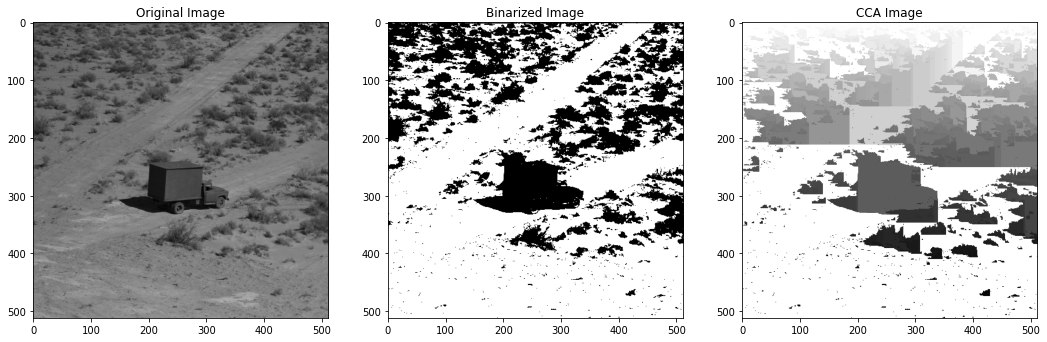

In [19]:
I = img3

# Binarizing Image using Otsu's intra-class variance algorithm
Binarize_I = Otsu_IntraClassVariance(I)

# CCA
CCA_I = CCA(Binarize_I)

# Displaying Images
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(I, cmap='gray')

plt.subplot(1,3,2)
plt.title("Binarized Image")
plt.imshow(Binarize_I, cmap='gray')

plt.subplot(1,3,3)
plt.title("CCA Image")
plt.imshow(CCA_I/np.max(CCA_I), cmap='gray_r')

plt.show()

### 3.5 - Minor Blob Removal

In [20]:
def MinorBlobRemoval(I):
    return np.where(I == 1+np.argmax(np.bincount(I.flatten())[1:]), 0, 255)

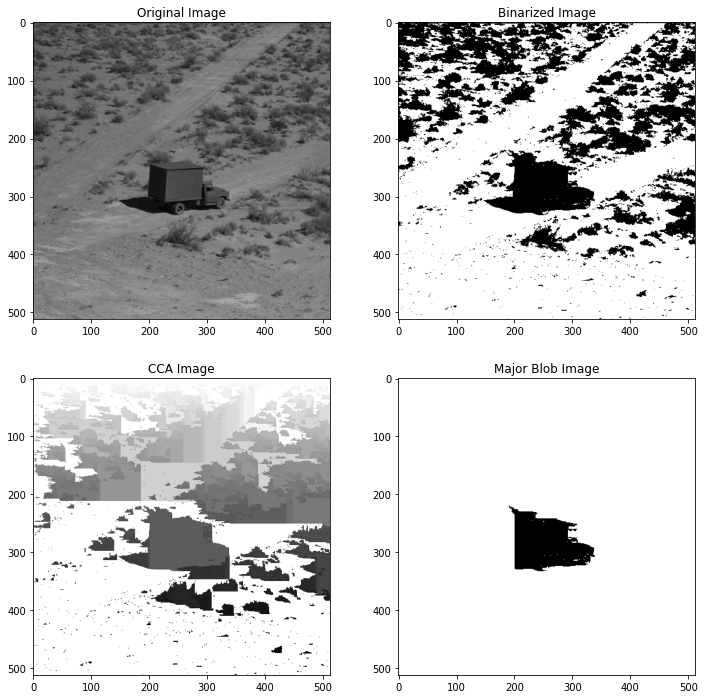

In [21]:
I = img3

# Binarizing Image using Otsu's intra-class variance algorithm
Binarize_I = Otsu_IntraClassVariance(I)

# CCA
CCA_I = CCA(Binarize_I)

# Minor Blob Removal
Major_I = MinorBlobRemoval(CCA_I)

# Displaying Images
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(I, cmap='gray')

plt.subplot(2,2,2)
plt.title("Binarized Image")
plt.imshow(Binarize_I, cmap='gray')

plt.subplot(2,2,3)
plt.title("CCA Image")
plt.imshow(CCA_I/np.max(CCA_I), cmap='gray_r')

plt.subplot(2,2,4)
plt.title("Major Blob Image")
plt.imshow(Major_I, cmap='gray')

plt.show()